# Avocado Price Dataset Analysis :
<img src="https://raw.githubusercontent.com/Lipsa-Patro/Python-Practise/4647ea6eda43f3f42197e3db8a6565c9674fc6cb/images/avocado.jpg" align='centre'><br/>

## Table of Contents

* [Problem Statement](#section1)<br>
* [Data Loading and Description](#section2)
* [EDA and Draw Insights](#section7)<br/>
* [Model predictions/Evaluation](#section17)<br/>
* [Conclusions](#section22)<br/>  

### * Problem Statement

The goal in this project is to understand the price trends and the elements that have an impact on avocado sales in United States. Here,we will try to predict the Avocado’s Average Price based on given different features.

   ### * Import Packages

In [1]:
import pandas as pd
import matplotlib

import numpy as np
import seaborn as sns

%matplotlib inline

#import plotly.offline as py
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode
#init_notebook_mode(connected=True)
#from plotly import tools

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [55]:
import matplotlib.pyplot as plt

### * Data Loading and Description

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Unnamed column is not required , so we will drop the same.
df1=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv", index_col = 0)

In [5]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<table>
<tr><th>Features</th><th>Description</th></tr>
<tr><td>‘Total Volume’</td><td>Total sales volume of avocados</td></tr>
<tr><td>‘4046’</td><td>Total sales volume of  Small/Medium Hass Avocado</td></tr>
<tr><td>‘4225’</td><td>Total sales volume of Large Hass Avocado</td></tr>
<tr><td>‘4770’</td><td>Total sales volume of Extra Large Hass Avocado</td></tr>
<tr><td>‘Total Bags’</td><td>Total number of Bags sold</td></tr>
<tr><td>‘Small Bags’</td><td>Total number of Small Bags sold</td></tr>
<tr><td>‘Large Bags’</td><td>Total number of Large Bags sold</td></tr>
<tr><td>‘XLarge Bags’</td><td>Total number of XLarge Bags sold</td></tr>
<tr><td>‘type’</td><td>The type of avocado (organic or conventional)</td></tr>
<tr><td>‘year’</td><td>Year</td></tr> 
<tr><td>‘region’</td><td>The City or region observed</td></tr>  
</table>

### * Data Profiling

### * Understanding the Avocado Dataset

In [6]:
df2 = df1.shape
df2

(18249, 13)

Dataset has 18249 rows and 14 columns.

In [7]:
df3 = df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


1.Here we can see that we don't have any missing values (18249 complete data) and 13 columns. 

2.We have 9 columns with float values, 1 column with integer values and 3 object type columns.

In [8]:
# Descriptive statistics for all columns
df4 = df1.describe().T
df4

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


### * Profiling

In [2]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="avocado_before_preprocessing.html")

NameError: name 'pandas_profiling' is not defined

- Our pandas profiling report shows :
1. There is no co-relation between Average price and Total volume column.
2. We do not have any duplicate rows in data
3. Total volumn column is highly co-related with other columns (4046,4225,4770,Total Bags,Small Bags,Large Bags	,XLarge Bags)	

### * Preprocessing

In [9]:
# Our info report has showed, "Date" column was object type. So, we will convert into data type.
df1['Date']=pd.to_datetime(df1['Date'])  
df1.head(2)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [10]:
df5 = df1.dtypes
df5

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Now, we see Date column has changed to data type.

Our Dataset Did not have individual month and day column, so extracted the same for our further analysis.

In [11]:
df1['month'] = df1['Date'].dt.month   #(another code - avocado['month'] = pd.DatetimeIndex(avocado['Date']).month)
df1['day'] = df1['Date'].dt.day

In [12]:
df1.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13


### * EDA and Draw Insights

__Q.1 How average price has been distributed over given Dates ?__

NameError: name 'plt' is not defined

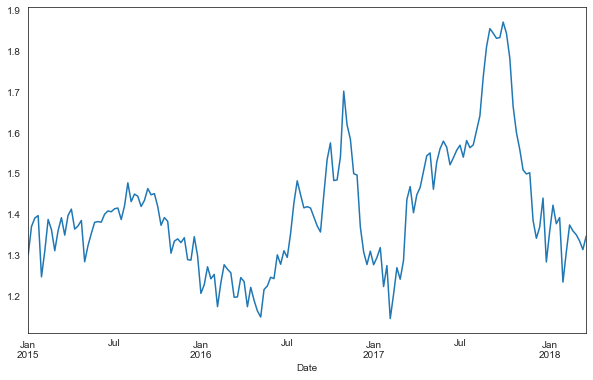

In [13]:
sns.set_style('white')
df5 = df1.groupby('Date').mean()
df5.AveragePrice.plot(figsize=(10,6))
plt.ylabel('Average Price')
plt.title('Average Price')

There is a seasonal trend and a general upward trajectory visible here over the years.
This also shows there was a huge hike in prices after __July 2017 and before Jan 2018__. 

__Q.2 In which range Average price lies, what is distribution look like?__

<AxesSubplot:xlabel='AveragePrice'>

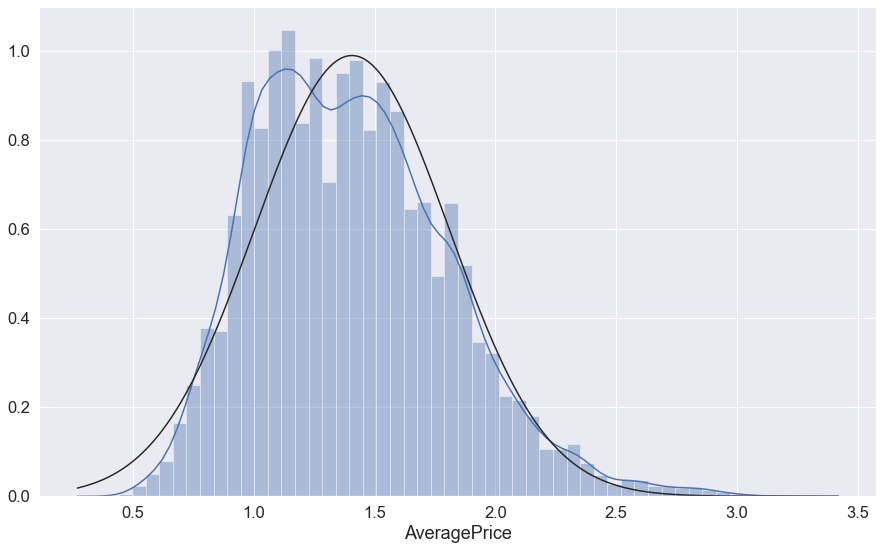

In [56]:
sns.set_style('white')
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig,ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df1.AveragePrice, kde= True, fit=norm)

Average Price distribution shows that for most cases __price of avocado is between 1.1, 1.6.__

__Q.3 Which type of Avocados are more in demand (Conventional or Organic)?__

In [57]:
df6=df1.groupby('type')['Total Volume'].agg('sum')


values=[df6['conventional'],df6['organic']]
labels=['conventional','organic']
demand=go.Pie(labels=labels,values=values)
py.iplot([demand])

NameError: name 'go' is not defined

- Just over __2% of our dataset is organic__. So looks like __Conventional is in more demand__. Now, let's look at the average price distribution

__Q.4 what is the price difference percentage between conventional and organic avocado?__

<AxesSubplot:xlabel='type'>

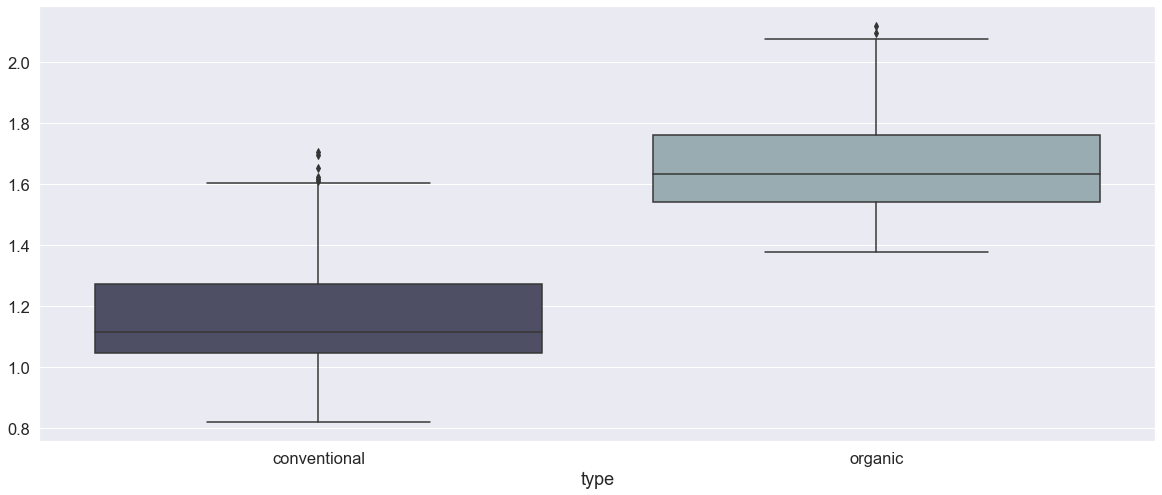

In [58]:
df7 =df1.pivot_table(index='Date', columns='type', aggfunc='mean')['AveragePrice']
plt.figure(figsize = (20,8))
sns.boxplot(data=df7, palette='bone')

From above two plots, we can understand :
1.Organic avocados are priced 45% higher than Conventional avocados. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them.

2.As organic avocados expensive, there is high demand of Conventional avocados.

__Q.5 What is the contribution of organic avocado in total revenue?__

In [17]:
df1['Total indiv']=df1['Total Volume']-df1['Total Bags']
df1['Revenue indiv']=df1['Total indiv']*df1['AveragePrice']
df1['Revenue Bagged']=df1['Total Bags']*df1['AveragePrice']
df1['Revenue Total']=df1['Revenue Bagged']+df1['Revenue indiv']

In [18]:
df_r=df1.pivot_table(index='Date', columns='type', aggfunc='sum')[['Revenue indiv', 'Revenue Bagged', 'Revenue Total']]

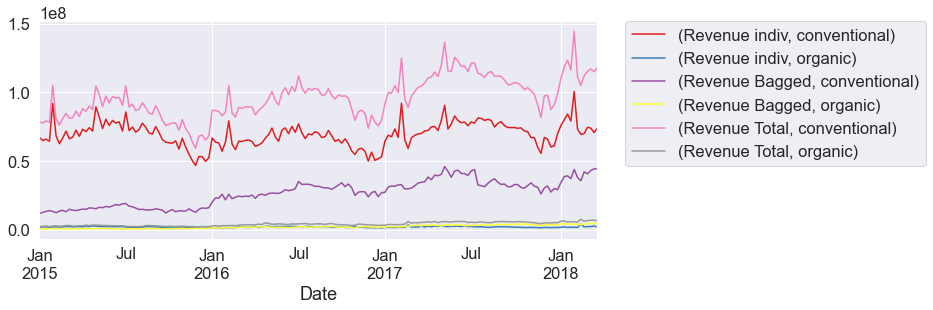

In [59]:
df_r.plot(cmap='Set1', figsize=(10,4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Although the average price of organic avocados is much higher,however the revenue from organic avocados doesn't account for much of the total revenue.

 __Q.6 How Average price is distributed over years,months and dates for Conventional and Organic Types?__

In [19]:
df8 = df1.pivot_table(index='month', columns='year', aggfunc='mean')['AveragePrice']

In [20]:
month_order={
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}

NameError: name 'plt' is not defined

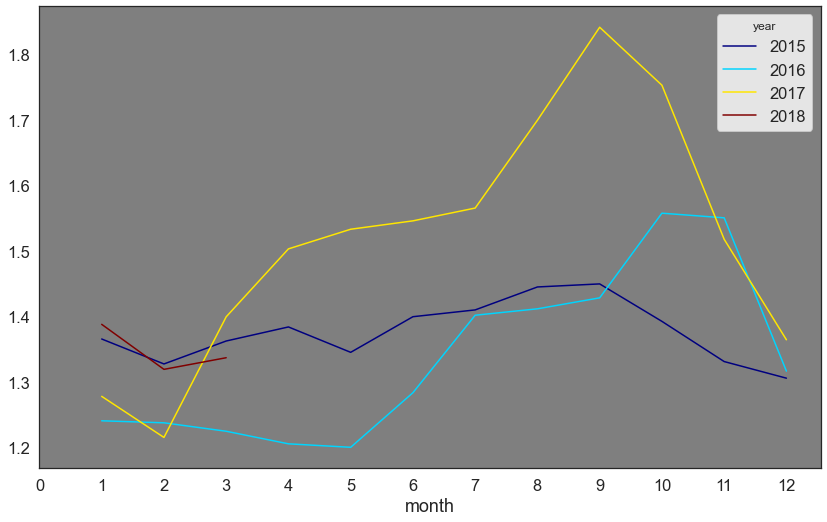

In [21]:
sns.set_style('white')
fig=df8.loc[month_order].plot(figsize=(14,8.5), xticks=range(0,13), cmap='jet')
fig.set_facecolor('#7F7F7F')
plt.text(x=0.7, y=1.9, s='Winter', color='#98F5FF', fontsize=15)
plt.vlines(x=0, ymin=0.8, ymax=2, color='lightblue', linestyles=':', linewidth=3)
plt.text(x=3.8, y=1.9, s='Spring', color='#7FFF00', fontsize=15)
plt.vlines(x=2.5, ymin=0.8, ymax=2, color='#7FFF00', linestyles=':', linewidth=3)
plt.text(x=6.8, y=1.9, s='Summer', color='#FFB6C1', fontsize=15)
plt.vlines(x=5.5, ymin=0.8, ymax=2, color='pink', linestyles=':', linewidth=3)
plt.text(x=9.5, y=1.9, s='Fall', color='orange', fontsize=15)
plt.vlines(x=8.5, ymin=0.8, ymax=2, color='orange', linestyles=':', linewidth=3)
plt.ylabel('Average Price(USD)')

Looks like there was a __hike between months 8 – 10 (fall season) for both Conventional and Organic type__ of Avocados prices, when we only plotted month wise.

It means, here we are seeing seasonal trend that towards fall season supply is less and demand might be more. So, in general average is always higher.

<Figure size 2160x1440 with 0 Axes>

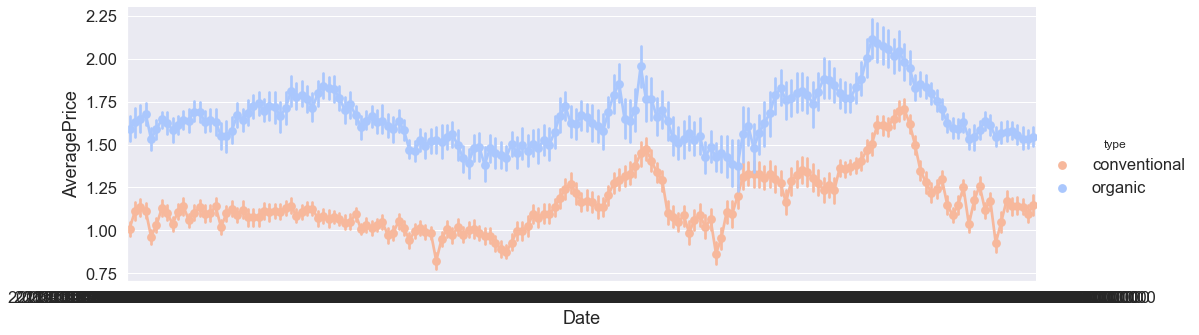

In [60]:
plt.figure(figsize = (30,20))
ax=sns.factorplot(x='Date', y='AveragePrice', data=df1,hue='type',aspect=3, palette='coolwarm_r')


When we plot __each date__, we see here in a given point of time organic avocado and conventional avocado average price was almost same. It means conventional avocado priced had increased. (as organic avocado is anyways 45% higher. We have seen above)
__Let's find out that year and month__.

In [23]:
df9 = df1.pivot_table(index= ['year','month'],columns='type',aggfunc = 'mean')['AveragePrice']


In [24]:
df9['differ'] = abs(df9.conventional-df9.organic)

In [25]:
df10 =df9['differ'].sort_values(ascending = True)
df10

year  month
2017  3        0.213704
2016  11       0.343657
2017  10       0.357556
      4        0.389741
2016  10       0.407593
2018  1        0.411620
      3        0.411620
2017  2        0.419120
2016  6        0.421019
      7        0.431926
2017  9        0.439954
2016  3        0.445833
2017  12       0.460889
2016  8        0.462685
2017  1        0.467889
2016  12       0.474954
      9        0.479815
      4        0.487824
2017  7        0.492889
2018  2        0.494630
2017  5        0.505000
2015  5        0.508333
2016  1        0.508519
2017  11       0.514028
      6        0.516061
      8        0.519954
2016  5        0.527000
2015  4        0.533194
      2        0.543241
      3        0.544185
      1        0.545185
      7        0.591111
      12       0.599378
2016  2        0.599583
2015  11       0.611296
      6        0.625185
      8        0.654889
      10       0.655972
      9        0.747731
Name: differ, dtype: float64

Here, we can see that in March 2017 has the minimum price difference between the organic and conventional avocados i.e 0.2

__We will plot the data below__

In [26]:
df11 =df1.pivot_table(index='Date', columns='type', aggfunc='mean')['AveragePrice']


Text(0, 0.5, 'Average Price')

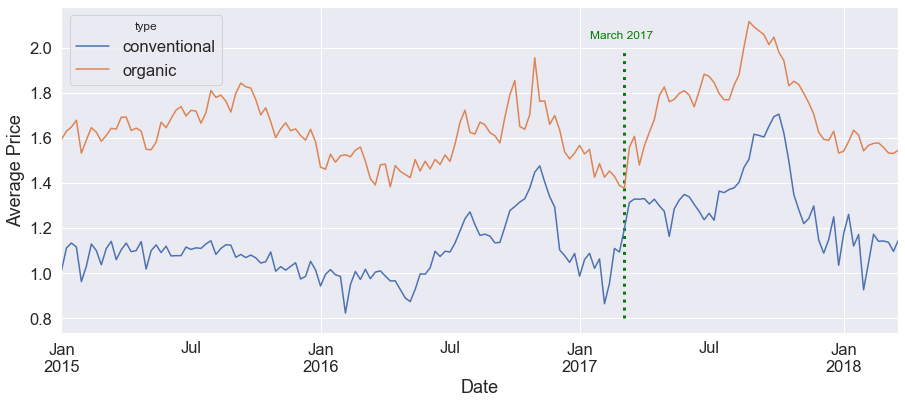

In [61]:
df11.plot(figsize=(15,6))
plt.text(x='2017-1-15', y=2.04, s='March 2017', color='green', fontsize=12)
plt.vlines(x='2017-3-1', ymin=0.8, ymax=2, color='green', linestyles=':', linewidth=3, label='March 2017')
plt.ylabel('Average Price')

__Now we will find out, why the conventional avocado price has got jacked up, as it almost matched organic avocado price?__

In [28]:
df12=df1.pivot_table(index='Date', aggfunc='sum')  # we are taking out volume here
b=df12.index
z=[]
for i in range(len(df12)):
    m=b[i].strftime("%B")
    z.append(m)
ab=[]
for i in range(len(df12)):
    m=b[i].strftime("%Y")
    ab.append(m)
df12['month']=z
df12['year']=ab

Text(0.5, 1.0, 'Total Volume')

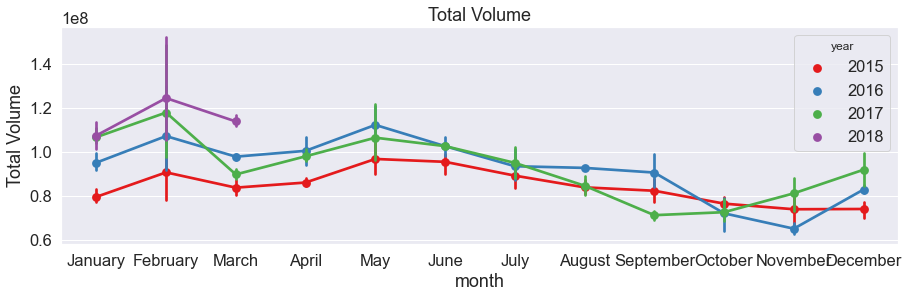

In [62]:
plt.figure(figsize=(15,4))
sns.pointplot(x='month', y='Total Volume', data=df12, hue='year', palette='Set1')
plt.title('Total Volume')

-From this plot we can conclude that Jan 2018 has highest sell against previous years .
-In 2017 March volume of avocados (conventional) has drastically fallen, that was reason of price had hiked.

**Price fluctuations in each year**

In [30]:
year_15=df1.loc[df1['year']==2015]
year_16=df1.loc[df1['year']==2016]
year_17=df1.loc[df1['year']==2017]
year_18=df1.loc[df1['year']==2018]

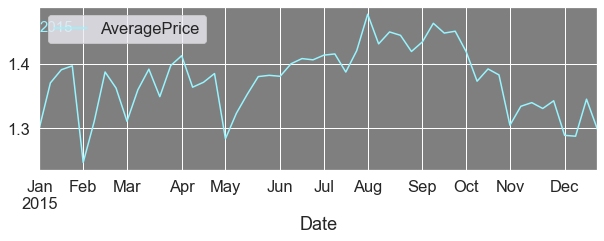

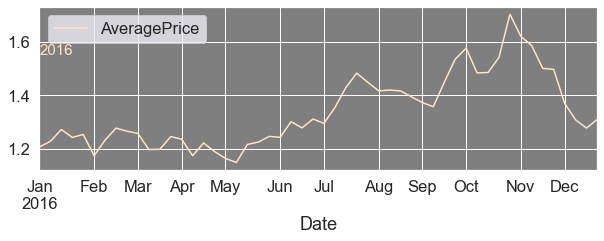

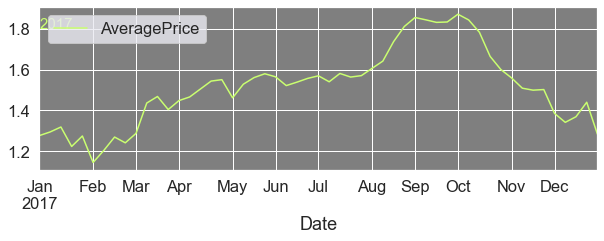

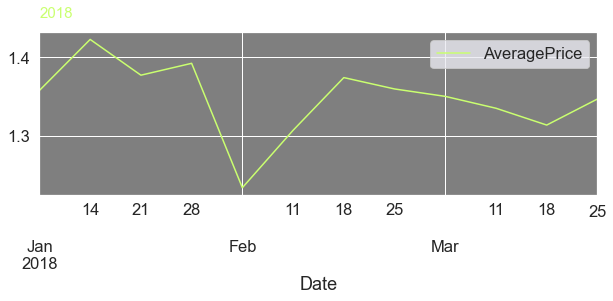

In [63]:
fig1=year_15.groupby('Date').mean().plot(y='AveragePrice', figsize=(10,3), kind='line', sharex=True, color='#98F5FF')
plt.text(x='2015-1-1', y=1.45, s='2015', color='#98F5FF', fontsize=15)
fig1.set_facecolor('#7F7F7F')

fig2=year_16.groupby('Date').mean().plot(y='AveragePrice', figsize=(10,3), kind='line', sharex=True, color='#FFE4C4')
plt.text(x='2016-1-1', y=1.55, s='2016', color='#FFE4C4', fontsize=15)
fig2.set_facecolor('#7F7F7F')

fig3=year_17.groupby('Date').mean().plot(y='AveragePrice', figsize=(10,3), kind='line', sharex=True, color='#CAFF70')
plt.text(x='2017-1-1', y=1.8, s='2017', color='#CAFF70', fontsize=15)
fig3.set_facecolor('#7F7F7F')

fig3=year_18.groupby('Date').mean().plot(y='AveragePrice', figsize=(10,3), kind='line', sharex=True, color='#CAFF70')
plt.text(x='2018-1-1', y=1.45, s='2018', color='#CAFF70', fontsize=15)
fig3.set_facecolor('#7F7F7F')

In 2015 the average price of avocado is highest in the month of August and minimum in february.

Where as the average price of avocado is lowest in the month of May and highest in the month of october in 2016.

In 2017, the price has grown steadily over the year .

In 2015 the average price of the avocado is highly flauctuating over the year that means the availablilty is low over the year of 2015.But the average price over the year 2016 is very stable and minimal which show the rich supply of avocado.

__Q.7 The market share of organic price is growing or not ?__

In [32]:
df13=df1.pivot_table(index='Date', columns='type', aggfunc='sum') #we are taking type and volume both


In [33]:
e=df13['Total Volume'].sum(axis=1)
f=df13['Total Volume']['conventional']/e*100
g=100-df13['Total Volume']['conventional']/e*100
a=df13.index

Text(0, 0.5, 'Market share%')

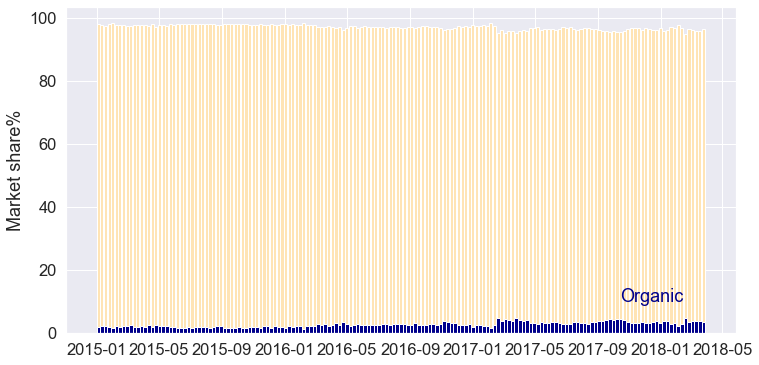

In [64]:
plt.figure(figsize=(12,6))
plt.text(x='2017-10-15', y=10, s='Organic', color='#00008b', fontsize=18)
plt.bar(x=a, height=f, width=6, color='#FFE4B5')
plt.bar(x=a, height=g, width=7, color='#00008b')
plt.ylabel('Market share%')

-Due to highly priced,market share for organic avocados is a very small percent,but there is an upward trajectory.
It means slowly organic price customers are growing. Which may contribute in total revenue in future.

###  *  Average price distribution based on region 

- __Q.8 What are TOP 5 regions where Average price are very high?__

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

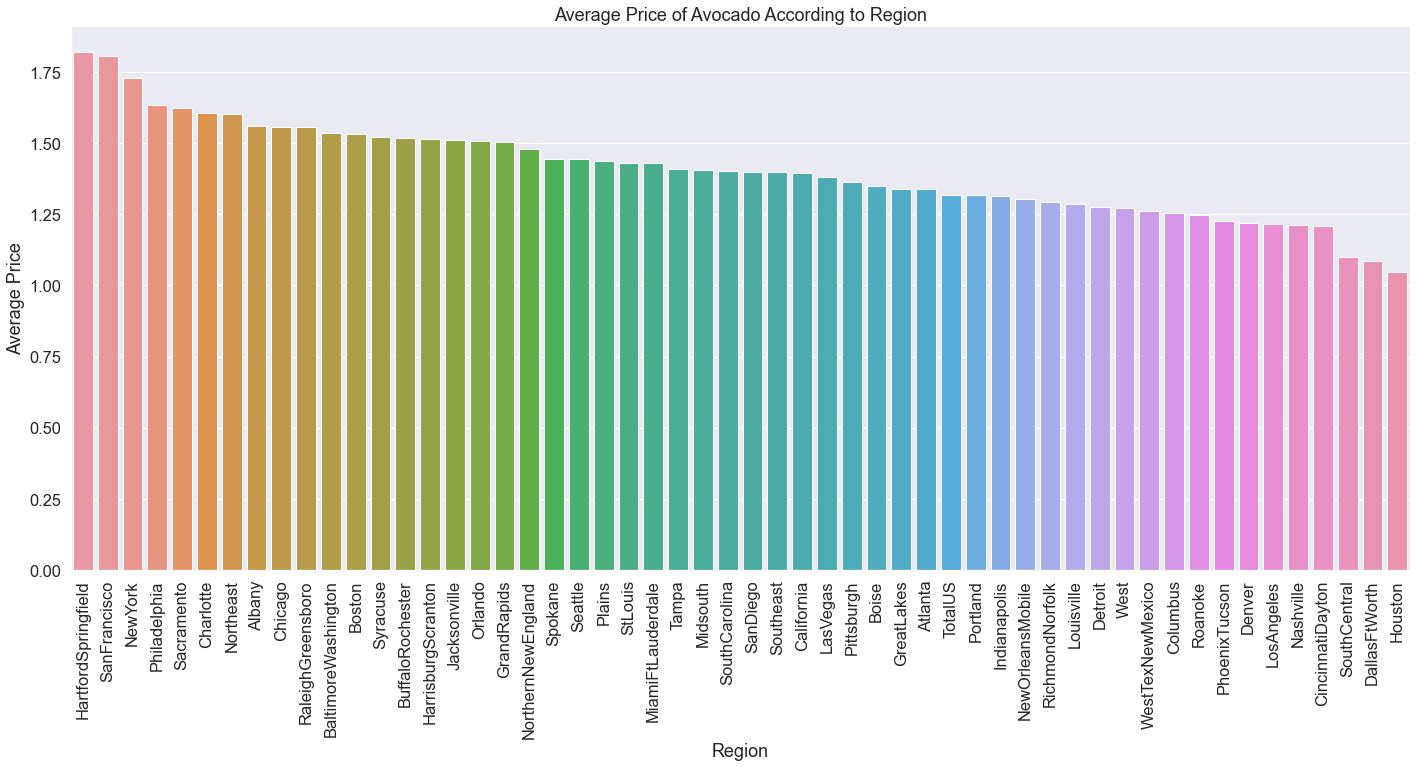

In [65]:
region_list=list(df1.region.unique())
average_price=[]

for i in region_list:
    x=df1[df1.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df14=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df14.average_price.sort_values(ascending=False).index.values
sorted_data=df14.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Here we can see top 5 regions are:
1.HartfordSpringfield
2.SanFrancisco
3.Newyork
4.Philadelphia
5.Sacramento

__Q.9 What are TOP 5 regions where Average consumption is very high?__

Text(0.5, 1.0, 'Average of Total Volume According to Region')

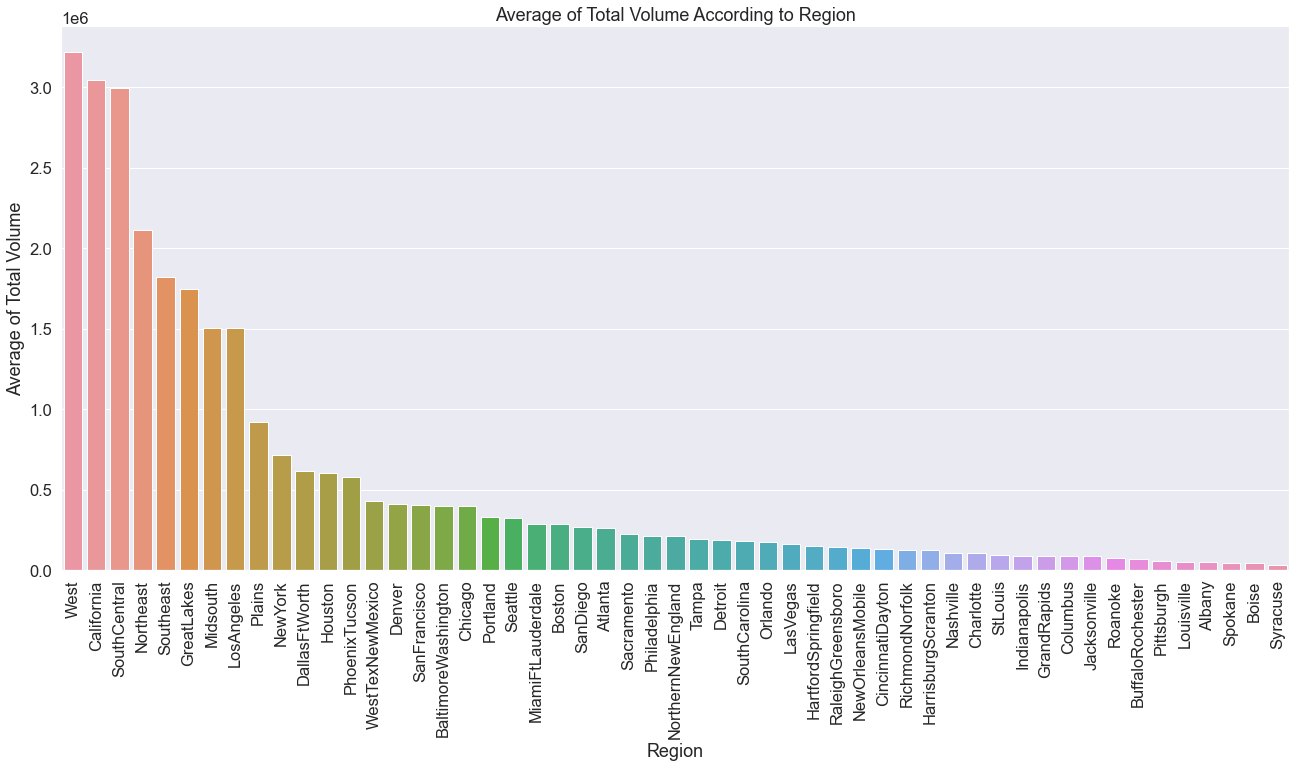

In [66]:
filter1=df1.region!='TotalUS'
df15=df1[filter1]

region_list=list(df15.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

The high consumption regions are:
1.West
2.California
3.SouthCentral
4.Northeast
5.Southeast

__Q.10 In which year and for which region was the Average price the highest?__

In [ ]:
df16 = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='magma',
                   join=False,
              )

- Looks like there was a __huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region.

 __Q.8 How dataset features are correlated with each other?__

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)

- As we can from the heatmap above, all the Features are not correleted with the __Average Price column__, instead most of them are correlated with each other. So now I am bit worried because that will not help us get a good model. Lets try and see.

- First we have to do some Feature Engineering on the __categorical Features : region and type__

## * Feature Engineering for Model building

In [37]:
df['region'].nunique()

54

In [ ]:
df['type'].nunique()

- We have __54 regions__ and __2 unique types__, so it's going to be easy to to transform the __type feature__ to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

- I will drop the Date Feature as well because I already have __3 other columns for the Year, Month and Day__.

In [38]:
df17 = pd.get_dummies(df1.drop(['region','Date'],axis=1),drop_first=True)

In [39]:
df17.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day,Total indiv,Revenue indiv,Revenue Bagged,Revenue Total,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,55539.75,73867.8675,11566.8371,85434.7046,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,45371.42,61251.4170,12832.5060,74083.9230,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,110074.87,102369.6291,7575.1755,109944.8046,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,73180.99,79035.4692,6276.0528,85311.5220,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,44855.65,57415.2320,7915.4560,65330.6880,0


In [40]:
df17.drop(['Total indiv','Revenue indiv','Revenue Bagged','Revenue Total'], axis=1,inplace=True)

In [41]:
df17.shape

(18249, 13)

In [42]:
df17.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0


df17.head(2)

# * Model predictions/Evaluation

- Our Target variable __'AveragePrice' is continuous__.So, will apply our model which is going to be the __Linear Regression because 
- Let's now begin to train out regression model! We will need to first split up our data into an __X array that contains the features to train on__, and a __y array with the target variable__.

In [43]:
X=df17.iloc[:,1:14]
y=df17['AveragePrice']

In [46]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  18249 non-null  float64
 1   4046          18249 non-null  float64
 2   4225          18249 non-null  float64
 3   4770          18249 non-null  float64
 4   Total Bags    18249 non-null  float64
 5   Small Bags    18249 non-null  float64
 6   Large Bags    18249 non-null  float64
 7   XLarge Bags   18249 non-null  float64
 8   year          18249 non-null  int64  
 9   month         18249 non-null  int64  
 10  day           18249 non-null  int64  
 11  type_organic  18249 non-null  uint8  
dtypes: float64(8), int64(3), uint8(1)
memory usage: 1.7 MB


In [47]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Linear regression -------------------------------------------------------------------------------------

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [49]:
import statsmodels.api as sm
model = sm.OLS(y,X)
fitted2 = model.fit()
fitted2.summary()

ModuleNotFoundError: No module named 'statsmodels'

### the R square value for linear regression is 0.433

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) # compairing the value and find the approxmat fitting of thr data

0.43307059346784893

In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.23297133291653516
MSE: 0.0910880280533659
RMSE: 0.3018079323897334


- The __RMSE is low so we can say that we do have a good model, but lets check to be more sure__.
- Lets plot the __y_test vs the predictions__

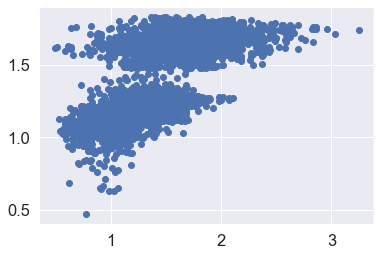

In [67]:
plt.scatter(x=y_test,y=y_pred)

# Decision Tree-----------------------------------------------------------------------------

__we don't have a straight line so I am not sure that this is the best model we can apply on our data__. Let's try __DT Regressor__

In [70]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y1_pred=dtr.predict(X_test)


In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, y1_pred)

0.7224278663133394

### the R square value for the decision tree is 0.7227

Text(0, 0.5, 'Predicted Y')

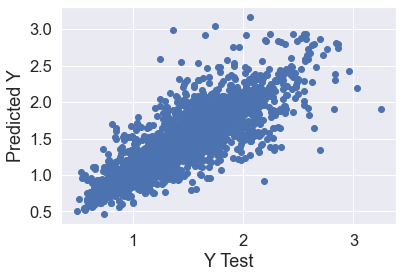

In [72]:
plt.scatter(x=y_test,y=y1_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

we can see that __we nearly have a straight line__, in other words __its better than the Linear regression model, and to be more sure lets check the RMSE__

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, y1_pred))
print('MSE:', metrics.mean_squared_error(y_test, y1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y1_pred)))

MAE: 0.13558356164383562
MSE: 0.0445972602739726
RMSE: 0.21118063423044406


# Random Forest----------------------------------------------------------------------------------------

__RMSE is lower than the previous one we got with Linear Regression__. Hoever can i __improve my predictions for this data which is the RandomForestRegressor__?

In [74]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
y2_pred=rdr.predict(X_test)

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y2_pred)

0.8676296766083196

### the r square value is highest in random forest 0.866

Text(0, 0.5, 'Predicted Y')

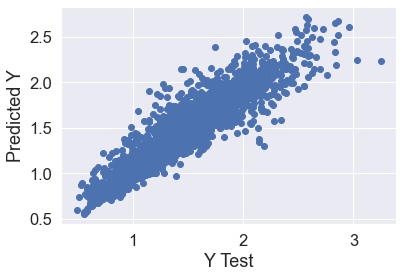

In [76]:
plt.scatter(x=y_test,y=y2_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

__Here we see line looks more linear and less error, Let's check RMSE value for this as well__.

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, y2_pred))
print('MSE:', metrics.mean_squared_error(y_test, y2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y2_pred)))

MAE: 0.10064189041095888
MSE: 0.021267818517808207
RMSE: 0.14583490157643406


__RMSE is lower than the two previous models__, so the __RandomForest Regressor is the best model in this case.

<AxesSubplot:xlabel='AveragePrice'>

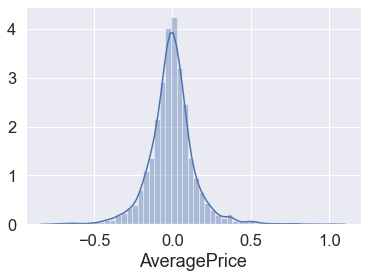

In [78]:
sns.distplot((y_test-y2_pred),bins=50)

We can see here,__residuals looked to be normally distributed__,which means that our model was a correct choice for the data. 

- __Final Actual Vs Predicted sample.__

,Y Test,Pred
6,0.82,0.9606
8,0.97,0.9972
48,1.44,1.4116
42,0.97,0.9046
45,1.45,1.4417


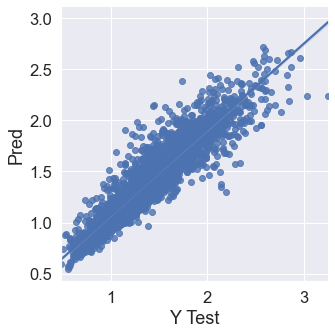

In [79]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y2_pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data)
data.head()

## * Conclusions

In [ ]:
import random 
t=random.randrange(0,1800,2)
x_trail=X.iloc[t]
y_real=y.iloc[t]
x_trail
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred1=rdr.predict(x_trail)
pred
import random 
t=random.randrange(0,1800,2)
x_trail=X.iloc[6]#np.array([1, 2000, 3, 4, 5, 26, 7]).reshape(-1, 1)
y_real=y.iloc[t]

## ANN for predicting the values 

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14599 entries, 7 to 47
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  14599 non-null  float64
 1   4046          14599 non-null  float64
 2   4225          14599 non-null  float64
 3   4770          14599 non-null  float64
 4   Total Bags    14599 non-null  float64
 5   Small Bags    14599 non-null  float64
 6   Large Bags    14599 non-null  float64
 7   XLarge Bags   14599 non-null  float64
 8   year          14599 non-null  int64  
 9   month         14599 non-null  int64  
 10  day           14599 non-null  int64  
 11  type_organic  14599 non-null  uint8  
dtypes: float64(8), int64(3), uint8(1)
memory usage: 1.4 MB


In [87]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


In [93]:
import tensorflow as tf

In [109]:
model_reg= tf.keras.models.Sequential()
#model_reg.add(tf.keras.layers.Flatten())
model_reg.add(tf.keras.layers.Dense(12,activation='relu'))
model_reg.add(tf.keras.layers.Dense(12,activation='relu'))
model_reg.add(tf.keras.layers.Dense(12,activation='relu'))
model_reg.add(tf.keras.layers.Dense(12,activation='relu'))
model_reg.add(tf.keras.layers.Dense(1))
model_reg.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse',metrics=['accuracy'])

In [115]:
model_reg.fit(x=X_train,y=y_train,
          batch_size=128,epochs=200)

Train on 14599 samples
Epoch 1/200
14599/14599 [==============================] - 0s 25us/sample - loss: 106094.0149 - accuracy: 0.0031
Epoch 2/200
14599/14599 [==============================] - 0s 23us/sample - loss: 82087.9933 - accuracy: 0.0027
Epoch 3/200
14599/14599 [==============================] - 0s 23us/sample - loss: 558191.4596 - accuracy: 0.0032
Epoch 4/200
14599/14599 [==============================] - 0s 24us/sample - loss: 1263808.5559 - accuracy: 0.0036
Epoch 5/200
14599/14599 [==============================] - 0s 24us/sample - loss: 17917420.6400 - accuracy: 0.0045
Epoch 6/200
14599/14599 [==============================] - 0s 24us/sample - loss: 8794730.6186 - accuracy: 0.0042
Epoch 7/200
14599/14599 [==============================] - 0s 23us/sample - loss: 743436.5990 - accuracy: 0.0047
Epoch 8/200
14599/14599 [==============================] - 0s 24us/sample - loss: 500619.5252 - accuracy: 0.0032
Epoch 9/200
14599/14599 [==============================] - 0s 23us/sam

14599/14599 [==============================] - 0s 25us/sample - loss: 46.8160 - accuracy: 8.9047e-04
Epoch 74/200
14599/14599 [==============================] - 0s 23us/sample - loss: 36.3621 - accuracy: 8.2197e-04
Epoch 75/200
14599/14599 [==============================] - 0s 21us/sample - loss: 30.7396 - accuracy: 6.8498e-04
Epoch 76/200
14599/14599 [==============================] - 0s 22us/sample - loss: 25.8901 - accuracy: 6.1648e-04
Epoch 77/200
14599/14599 [==============================] - 0s 21us/sample - loss: 22.7021 - accuracy: 6.8498e-04
Epoch 78/200
14599/14599 [==============================] - 0s 22us/sample - loss: 21.3140 - accuracy: 8.2197e-04
Epoch 79/200
14599/14599 [==============================] - 0s 23us/sample - loss: 19.2043 - accuracy: 8.9047e-04
Epoch 80/200
14599/14599 [==============================] - 0s 22us/sample - loss: 18.2274 - accuracy: 0.0010
Epoch 81/200
14599/14599 [==============================] - 0s 21us/sample - loss: 18.4933 - accuracy: 6.

14599/14599 [==============================] - 0s 22us/sample - loss: 0.5088 - accuracy: 0.0089
Epoch 147/200
14599/14599 [==============================] - 0s 21us/sample - loss: 0.5205 - accuracy: 0.0090
Epoch 148/200
14599/14599 [==============================] - 0s 21us/sample - loss: 0.5082 - accuracy: 0.0089
Epoch 149/200
14599/14599 [==============================] - 0s 22us/sample - loss: 0.4053 - accuracy: 0.0089
Epoch 150/200
14599/14599 [==============================] - 0s 22us/sample - loss: 0.3665 - accuracy: 0.0090
Epoch 151/200
14599/14599 [==============================] - 0s 21us/sample - loss: 0.4556 - accuracy: 0.0090
Epoch 152/200
14599/14599 [==============================] - 0s 21us/sample - loss: 0.3233 - accuracy: 0.0090
Epoch 153/200
14599/14599 [==============================] - 0s 22us/sample - loss: 0.3456 - accuracy: 0.0090
Epoch 154/200
14599/14599 [==============================] - 0s 24us/sample - loss: 0.3131 - accuracy: 0.0090
Epoch 155/200
14599/1459

In [116]:
model_reg.evaluate(X_test, y_test)

3650/3650 [==============================] - 0s 59us/sample - loss: 0.3292 - accuracy: 0.0096


[0.3292050149669386, 0.009589041]

In [117]:
losses = pd.DataFrame(model_reg.history.history)

In [118]:
losses

,loss,accuracy
0,1.060940e+05,0.003082
1,8.208799e+04,0.002671
2,5.581915e+05,0.003219
3,1.263809e+06,0.003630
4,1.791742e+07,0.004452
...,...,...
195,2.878411e-01,0.009042
196,2.822756e-01,0.009042
197,3.041116e-01,0.009042
198,2.508433e-01,0.009042


<AxesSubplot:>

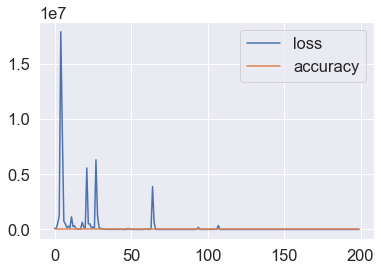

In [119]:
losses.plot()

In [122]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
predictions = model_reg.predict(X_test)

In [123]:
mean_absolute_error(y_test,predictions)

0.34568076618240307

In [124]:
np.sqrt(mean_squared_error(y_test,predictions))

0.5737638975540467